In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
# import torchvision
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
 

In [2]:
class dataset(Dataset):
    def __init__(self,data,labels)->None:
        self.x = torch.reshape(data,(-1,1,28,28))
        self.y= F.one_hot(labels,10).float()
        try:
            self.len = len(labels)
        except:    
            self.len = labels.shape[0]

    def __getitem__(self,index):
        return self.x[index],self.y[index]

    def __len__(self):
        return self.len

In [3]:
df = pd.read_csv('./data/train.csv')
df.shape

(42000, 785)

In [4]:
labels = torch.tensor(df['label'])


In [5]:
data = torch.zeros(42000, 784)
for i, _ in enumerate(labels):
    if i % 10000 == 0:
        print(f"{i}th datapoint")
    data[i]= torch.tensor(df.iloc[i, 1:785])

data = torch.reshape(data, (42000,28,28))



0th datapoint
10000th datapoint
20000th datapoint
30000th datapoint
40000th datapoint


In [6]:
# train_data = data
del df

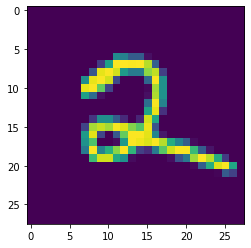

In [7]:
sample_image=data[41000]
plt.imshow(sample_image)


In [8]:
for i,image in enumerate(data):
    data[i] = image/torch.max(image)

In [9]:

# one_hot_labels = F.one_hot(labels,10).float()


In [10]:
train_x, val_x, train_label, val_label = tts(data, labels, train_size=0.8, shuffle=True)
train_oh = F.one_hot(train_label,10).float()
val_oh = F.one_hot(val_label,10).float()

In [11]:
print(f'train_x shape : {train_x.shape}')
print(f'val_x shape : {val_x.shape}')
print(f'train_oh shape : {train_oh.shape}')
print(f'val_oh shape : {val_oh.shape}')
print(f'data shape : {data.shape}')
print(f'labels shape : {labels.shape}')

train_x shape : torch.Size([33600, 28, 28])
val_x shape : torch.Size([8400, 28, 28])
train_oh shape : torch.Size([33600, 10])
val_oh shape : torch.Size([8400, 10])
data shape : torch.Size([42000, 28, 28])
labels shape : torch.Size([42000])


Using cpu device


C:\Users\as116\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
C:\Users\as116\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0 completed ---------accuracy:100.0%
epoch 1 completed ---------accuracy:100.0%
epoch 2 completed ---------accuracy:100.0%
epoch 3 completed ---------accuracy:100.0%
epoch 4 completed ---------accuracy:100.0%
epoch 5 completed ---------accuracy:100.0%
epoch 6 completed ---------accuracy:100.0%
epoch 7 completed ---------accuracy:100.0%
epoch 8 completed ---------accuracy:100.0%
epoch 9 completed ---------accuracy:100.0%


Text(0.5, 1.0, 'Accuracy : 0.9502410714285714')

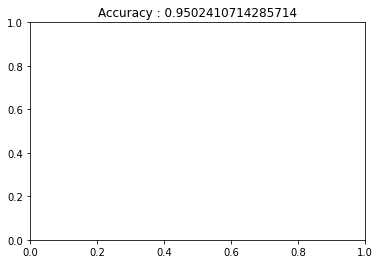

In [12]:
import model_archit

model = model_archit.model()
loss_fn = nn.MSELoss()
batch_size=16
loss_list=[]
accuracy_list=[]
alpha_0=0.1   #decaying learning rate parameters
alpha = 7
epochs=10
for epoch in range(epochs):
    lr = alpha_0/(1+alpha*epoch)
    optimizer = torch.optim.SGD(model.parameters(),lr=lr)

    for i,(image, label) in enumerate(zip(train_x,train_oh)):
        loss_minilist=[]
        accu=[]
        image = torch.reshape(image,(1,1,28,28))
        pred=model(image)
        loss=loss_fn(pred,label)
        accu.append(int(model.output.item() is np.argmax(label).item()))
        loss.backward()
        loss_minilist.append(loss.detach().numpy())
        if i%batch_size==0:
            loss_list.append(np.mean(loss_minilist))
            loss_minilist=[]
            optimizer.step()
            optimizer.zero_grad()
        # if i%5000==0:
            # print(f'loss is {loss_list[-1]}')
        accuracy = np.sum(accu)/len(accu)
        accuracy_list.append(accuracy)
    # print(f'epoch accuracy was {accuracy*100}%')
    print(f'epoch {epoch} completed ---------accuracy:{round(accuracy*100,2)}%')
        
model_accuracy = np.sum(accuracy_list)/len(accuracy_list)
# plt.plot(loss_list)
plt.title(f'Accuracy : {model_accuracy}')


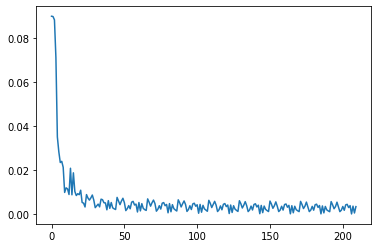

In [13]:
new_list = [np.mean(loss_list[100*x:100*x+100]) for x in range(len(loss_list)//100) ]
plt.plot(new_list)

True


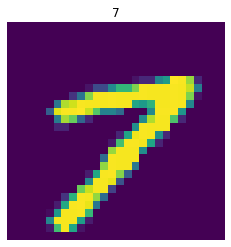

In [26]:
import random
idx=random.randint(0,val_x.shape[0])
image = torch.reshape(val_x[idx],(1,1,28,28))
pred = model(image)

plt.imshow(val_x[idx])
plt.title(model.output)
plt.axis('off')
print(model.output.item() is val_label[idx].item())

In [15]:
np.argmax(train_oh[0]).item()

3

In [16]:
val_label[idx].item()  is 0

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\as116\AppData\Local\Temp/ipykernel_10488/3805557495.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  val_label[idx].item()  is 0


False

In [17]:
df = pd.read_csv('./data/test.csv')
print('df shape: ',df.shape)
data = torch.zeros(df.shape)
data_len = data.shape[0]
num_points = data.shape[1]


df shape:  (28000, 784)


In [18]:
for i in range(data_len):
    if i % 10000 == 0:
        print(f"{i}th datapoint")
    data[i,]= torch.tensor(df.iloc[i,:])


0th datapoint
10000th datapoint
20000th datapoint


In [19]:
data.shape

torch.Size([28000, 784])

In [20]:
data = torch.reshape(data, (data_len,1,1,28,28))
sub = {'ImageId':[],'Label':[]}



In [21]:
for i in range(data_len):
    image=data[i]
    model(image)
    sub['ImageId'].append(i+1)
    sub['Label'].append(model.output)

In [22]:
sub_df = pd.DataFrame(sub)
sub_df.to_csv('submission.csv',index=False)
sub_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [23]:
sub_df.shape

(28000, 2)